### Image Segmentation

The problem with Object Detection for Self Driving cars and in Healthcare can be overcomed with Image Segmentation

By dividing the image into segments, we can make use of the important segments for processing the image. That, in a nutshell, is how image segmentation works.

An image is a collection or set of different pixels. We group together the pixels that have similar attributes using image segmentation.

Object detection builds a bounding box corresponding to each class in the image. But it tells us nothing about the shape of the object. We only get the set of bounding box coordinates. We want to get more information – this is too vague for our purposes.

<img src="./Images/instance_segmentation_example.JPG" alt="SSD_Mobilenet" width="500" height="600">


## Different Types of Image Segmentation

**Semantic Segmentation - The pixels belonging to a particular class are represented by the same color** 

**Instance Segmentation - The pixels belonging to a particular class are represented by the same color. Moreover, it also provides Object Detection as shown above**


<img src="./Images/semantic_instance-2.png" alt="SSD_Mobilenet" width="500" height="600">


### Region-based Segmentation: Here, we are using K- Means clustering to cluster the Images for its pixel

## Importing the necessary Libraries

**K-Means is a very important and powerful algorithm for data clustering. It is an Unsupervised Machine Learning technique which we can apply to find new patterns in our data. What's interesting about this algorithm is that we can also use it for image processing tasks. And in the same manner as with other type of data, we can find pixel patterns in our images that will allow us to process them in a faster and more efficient way.**


https://programmerbackpack.com/k-means-clustering-for-image-segmentation/

In [16]:
#!pip install -U scikit-learn

In [5]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage
from sklearn.cluster import KMeans

## Lets see how the image looks like

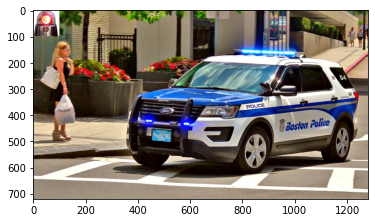

In [6]:
#image ="./images/bremen_000064_000019_leftImg8bit.png"
#image = plt.imread("./images/bremen_000064_000019_leftImg8bit.png")


image = plt.imread("./images/bostoncar.jpg")
image.shape
plt.imshow(image)

### Prepossing the Image: Normalizing the Image

In [9]:
pic = image/255
print(pic.shape)

(720, 1280, 3)


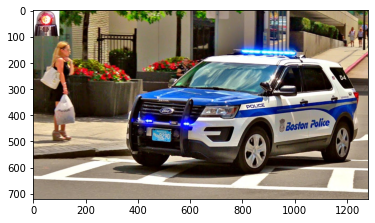

In [10]:
plt.imshow(pic)

### It’s a 3-dimensional image of shape (810, 1440, 3). For clustering the image using k-means, we first need to convert it into a 2-dimensional array whose shape will be (length*width, channels). In our example, this will be (810*1440, 3)

In [11]:
pic_n = pic.reshape(pic.shape[0]*pic.shape[1], pic.shape[2])
pic_n.shape

(921600, 3)

### The two dimentional shape of the image we got is : (1166400, 3)

In [12]:
pic_n.shape

(921600, 3)

In [13]:
print(pic_n[0])
print(pic_n[1])

[1. 1. 1.]
[1. 1. 1.]


In [14]:

kmeans = KMeans(n_clusters=5, random_state=0).fit(pic_n)
pic2show = kmeans.cluster_centers_[kmeans.labels_]

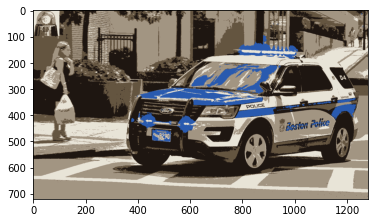

In [15]:
cluster_pic = pic2show.reshape(pic.shape[0], pic.shape[1], pic.shape[2])
plt.imshow(cluster_pic)

In [25]:
def kmeans_Algo(n_cluster):
    #for i in n_cluster:
    kmeans = KMeans(n_clusters=n_cluster, random_state=0).fit(pic_n)
    pic2show = kmeans.cluster_centers_[kmeans.labels_]
    cluster_pic = pic2show.reshape(pic.shape[0], pic.shape[1], pic.shape[2])
    plt.imshow(cluster_pic)

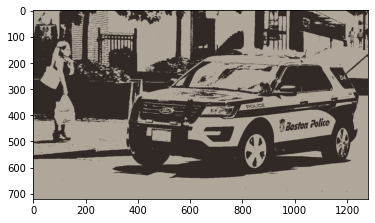

In [27]:
kmeans_Algo(2)

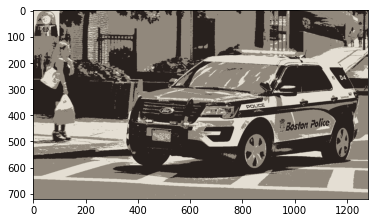

In [28]:
kmeans_Algo(3)

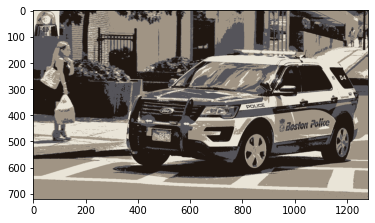

In [29]:
kmeans_Algo(4)

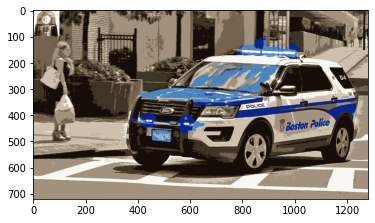

In [30]:
#n_cluster=[4,5,6,7,8,9,10]
kmeans_Algo(8)

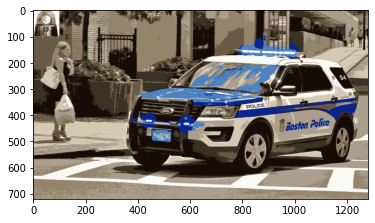

In [31]:
kmeans_Algo(9)

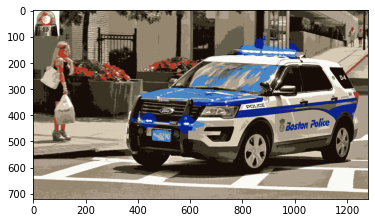

In [32]:
kmeans_Algo(10)

### We are able to segment the image pretty well using just 5 clusters. We can improve the clustering by increasing the value of K



***k-means works really well when we have a small dataset. It can segment the objects in the image and give impressive results. But the algorithm hits a roadblock when applied on a large dataset (more number of images).
It looks at all the samples at every iteration, so the time taken is too high. Hence, it’s also too expensive to implement.*** 

### K- Means clustering Using OpenCV

Python k-means image segmentation with opencv

In [35]:
import numpy as np
import cv2

def openCV_KMeans(img):
    img = cv2.imread(img)
    Z = img.reshape((-1,3))
    
    # convert to np.float32
    Z = np.float32(Z)

    # define criteria, number of clusters(K) and apply kmeans()
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    K = 8
    ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

    # Now convert back into uint8, and make original image
    center = np.uint8(center)
    res = center[label.flatten()]
    res2 = res.reshape((img.shape))

    plt.imshow(res2)

# cv2.imshow('res2',res2)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

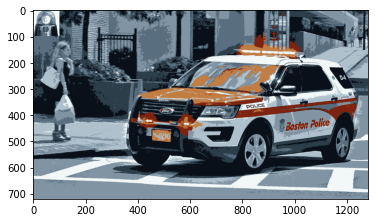

In [36]:
img="./images/bostoncar.jpg"
openCV_KMeans(img)

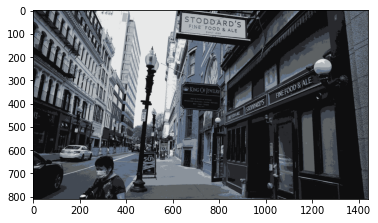

In [49]:
img="./images/Boston_city.jfif"
openCV_KMeans(img)

#img = cv2.imread(img)
#print(img.shape)
#print(img)
#Z = img.reshape((-1,3))

### This shows that K- Menas Clusteirng doesnot work good when Image contains many colors

## Canny edge detection in opencv

In [37]:
import cv2 as cv
import numpy as np


# Load original image
originalImage = cv.imread("./images/boston.jpeg")
originalImage = cv.cvtColor(originalImage, cv.COLOR_BGR2RGB)
originalImage.shape

(168, 300, 3)

In [38]:
reshapedImage = np.float32(originalImage.reshape(-1, 3))
reshapedImage.shape

(50400, 3)

### And next we also have to define when to stop our clustering algorithm. As mentioned earlier, we said we can either stop when there's no significant change after an iteration or when a big number of iterations has passed.

In [51]:
numberOfClusters = 2

stopCriteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.1)

### This will return us a list with the centroids and a list with all the pixels, in such way that every pixel is assigned to one of the centroids. From here, we can go on and replace all the values in a cluster with the value of the centroid of that cluster. We then need to reshape our current image to the shape of the original image and save our progress.

In [52]:
ret, labels, clusters = cv.kmeans(reshapedImage, numberOfClusters, None, stopCriteria, 10, cv.KMEANS_RANDOM_CENTERS)
print(clusters)
clusters = np.uint8(clusters)



[[170.24498  165.72803  164.0681  ]
 [ 59.119144  48.101288  43.615437]]


In [53]:
clusters

array([[170, 165, 164],
       [ 59,  48,  43]], dtype=uint8)

In [54]:
ret

171937680.91393167

In [55]:
labels

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int32)

In [56]:
labels.flatten()

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [57]:
np.unique(labels.flatten())

array([0, 1], dtype=int32)

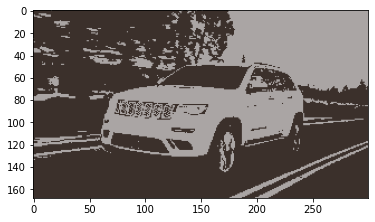

In [58]:
intermediateImage = clusters[labels.flatten()]
clusteredImage = intermediateImage.reshape((originalImage.shape))
plt.imshow(clusteredImage)
#cv.imwrite("clusteredImage.jpg", clusteredImage)

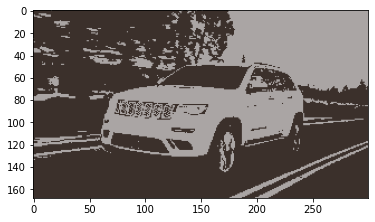

In [59]:
# Remove 1 cluster from image and apply canny edge detection
removedCluster = 1

cannyImage = np.copy(originalImage).reshape((-1, 3))
cannyImage[labels.flatten() == removedCluster] = [0, 0, 0]

cannyImage = cv.Canny(cannyImage,100,200).reshape(originalImage.shape)
plt.imshow(clusteredImage)
#cv.imwrite("cannyImage.jpg", cannyImage)

### Finding contours using opencv

### The next thing we need to do is to find all the contours in the image. The findContours method from opencv-python will help us get the coordinates of the contours.

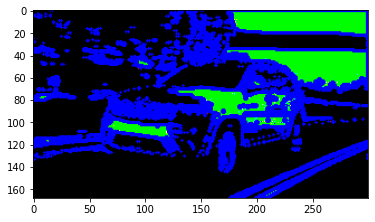

In [60]:
initialContoursImage = np.copy(cannyImage)
imgray = cv.cvtColor(initialContoursImage, cv.COLOR_BGR2GRAY)
_, thresh = cv.threshold(imgray, 50, 255, 0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(initialContoursImage, contours, -1, (0,0,255), cv.CHAIN_APPROX_SIMPLE)
cv.imwrite("initialContoursImage.jpg", initialContoursImage)
plt.imshow(initialContoursImage)

## Conclusion

k-means works really well when we have a small dataset. It can segment the objects in the image and give impressive results. But the algorithm hits a roadblock when applied on a large dataset (more number of images).

It looks at all the samples at every iteration, so the time taken is too high. Hence, it’s also too expensive to implement. And since k-means is a distance-based algorithm, it is only applicable to convex datasets and is not suitable for clustering non-convex clusters.

#### Mask R-CNN
Data scientists and researchers at Facebook AI Research (FAIR) pioneered a deep learning architecture, called Mask R-CNN, that can create a pixel-wise mask for each object in an image. This is a really cool concept so follow along closely!

Mask R-CNN is an extension of the popular Faster R-CNN object detection architecture. Mask R-CNN adds a branch to the already existing Faster R-CNN outputs. The Faster R-CNN method generates two things for each object in the image:
- Its class
- The bounding box coordinates

Mask R-CNN adds a third branch to this which outputs the object mask as well.

Its class
The bounding box coordinates
Mask R-CNN adds a third branch to this which outputs the object mask as well. Take a look at the below image to get an intuition of how Mask R-CNN works on the inside: